In [1]:
import numpy as np, json, matplotlib, pycm, pandas as pd, seaborn as sn
from datetime import datetime
from conceptual_engineering_assistant import Concept, ConceptualEngineeringAssistant
from langchain.tools import WikipediaQueryRun
from langchain.utilities import WikipediaAPIWrapper
from langchain.document_loaders import WikipediaLoader

In [2]:
SAMPLE_SIZE = 4
females = np.random.choice(json.load(open('data/females-2023-03-15.json', 'r')), SAMPLE_SIZE)
males = np.random.choice(json.load(open('data/males-2023-03-15.json', 'r')), SAMPLE_SIZE)
non_binaries = np.random.choice(json.load(open('data/non-binaries-2023-03-15.json', 'r')), SAMPLE_SIZE*2)
trans_men = np.random.choice(json.load(open('data/trans-men-2023-03-15.json', 'r')), SAMPLE_SIZE)
trans_women = np.random.choice(json.load(open('data/trans-women-2023-03-15.json', 'r')), SAMPLE_SIZE)
sample = np.concatenate((females, trans_women, non_binaries, trans_men, males))

In [3]:
for entity in sample:
    entity["description"] = WikipediaLoader(query=entity["name"], load_max_docs=1).load()[0].page_content[:400]

In [5]:
entities = pd.DataFrame.from_records(sample)
woman_conditions = [
    ((entities.gender == 'female') | (entities.gender == 'trans woman')),
    (entities.gender == 'non-binary'),
    ((entities.gender == 'male') | (entities.gender == 'trans man'))
]
woman_categories = ['True', 'Unknown', 'False']
entities['woman'] = np.select(woman_conditions, woman_categories)
entities

,item,name,article,gender,description,woman
0,http://www.wikidata.org/entity/Q65287,Lilian Harvey,https://en.wikipedia.org/wiki/Lilian_Harvey,female,Lilian Harvey (born Helene Lilian Muriel Pape;...,True
1,http://www.wikidata.org/entity/Q78020,Ditte Kotzian,https://en.wikipedia.org/wiki/Ditte_Kotzian,female,"Ditte Kotzian (born 9 March 1979, in East Berl...",True
2,http://www.wikidata.org/entity/Q78027,Duchess Maria Elisabeth in Bavaria,https://en.wikipedia.org/wiki/Duchess_Maria_El...,female,Duchess Maria Elisabeth Amalie Franziska in Ba...,True
3,http://www.wikidata.org/entity/Q53100,Charlotte Amalie of Hesse-Wanfried,https://en.wikipedia.org/wiki/Charlotte_Amalie...,female,Princess Charlotte Amalie of Hesse-Wanfried (M...,True
4,http://www.wikidata.org/entity/Q5110951,Christine Burns,https://en.wikipedia.org/wiki/Christine_Burns,trans woman,Christine Burns (born February 1954) is a Bri...,True
5,http://www.wikidata.org/entity/Q711397,Philippa York,https://en.wikipedia.org/wiki/Philippa_York,trans woman,Philippa York (born Robert Millar on 13 Septem...,True
6,http://www.wikidata.org/entity/Q108705294,Nyke Slawik,https://en.wikipedia.org/wiki/Nyke_Slawik,trans woman,"Nyke Slawik (born January 7, 1994) is a German...",True
7,http://www.wikidata.org/entity/Q6862172,Mimi Marks,https://en.wikipedia.org/wiki/Mimi_Marks,trans woman,"Mimi Marks (born February 11, 1967) is an Amer...",True
8,http://www.wikidata.org/entity/Q55754241,Kay O'Neill,https://en.wikipedia.org/wiki/Kay_O%27Neill,non-binary,"Kay O'Neill (also known as K. O'Neill, and who...",Unknown
9,http://www.wikidata.org/entity/Q28855062,Kiyan Williams,https://en.wikipedia.org/wiki/Kiyan_Williams,non-binary,Kiyan Williams is an American visual artist wh...,Unknown


In [6]:
oed_woman = Concept("oed_woman", "woman", "An adult female human being. The counterpart of man (see man, n.¹ II.4.)")

In [7]:
haslanger_woman = Concept("haslanger_woman", "woman", """S is a woman iff (i) S is regularly and for the most part observed or imagined to have 
certain bodily features presumed to be evidence of a female’s biological role in reproduction; 
(ii) that S has these features marks S within the dominant ideology of S’s society as someone who 
ought to occupy certain kinds of social position that are in fact subordinate (and so motivates 
and justifies S’s occupying such a position); and (iii) the fact that S satisfies (I) and (ii) plays 
a role in S’s systematic subordination, that is, along some dimension, S’s social position is oppressive, 
and S’s satisfying (i) and (ii) plays a role in that dimension of subordination""")

In [8]:
homosaurus_woman = Concept("homosaurus_woman", "woman", """Adults who self-identify as women and understand their gender in terms of Western conceptions of 
womanness, femaleness, and/or femininity. The term has typically been defined as adult female humans, though not all women identify with 
the term "female" depending on the context in which it is used.""")

In [9]:
cea = ConceptualEngineeringAssistant()

In [10]:
oed_classifications = pd.DataFrame( 
    [ cea.classify_entity(oed_woman, entity["name"], entity["description"]) for entity in sample ], 
    columns = [ 'entity' , 'in_extension', 'rationale' ] 
    )

In [11]:
oed_results = pd.concat([entities[["name", "gender", "woman"]], oed_classifications[["in_extension", "rationale"]]], axis=1)
results_styler = oed_results.style.set_properties(**{"text-align": "left", "overflow-wrap": "break-word"})
results_styler.set_table_styles([dict(selector='th', props=[('text-align', 'center')])]) 

,name,gender,woman,in_extension,rationale
0,Lilian Harvey,female,True,True,"Lilian Harvey is described as a female human being and she was an adult at the time of her death. Therefore, she fits the definition of a woman."
1,Ditte Kotzian,female,True,True,"The text states that Ditte Kotzian is a female and an adult, which aligns with the definition of a woman as an adult female human being. Therefore, Ditte Kotzian is a woman."
2,Duchess Maria Elisabeth in Bavaria,female,True,True,"Duchess Maria Elisabeth in Bavaria is described as an adult female human being, which aligns with the definition of a woman. Therefore, it is true that Duchess Maria Elisabeth in Bavaria is a woman."
3,Charlotte Amalie of Hesse-Wanfried,female,True,True,"Charlotte Amalie of Hesse-Wanfried is considered a woman because she is an adult female human being. This is evident from the description which refers to her as a ""Princess"" and ""wife,"" terms typically used for female individuals. Additionally, she is the daughter of a male (Charles, Landgrave of Hesse-Wanfried) and a female (Countess Alexandrine Juliane of Leiningen-Dagsburg), further confirming her gender as female."
4,Christine Burns,trans woman,True,True,"The text identifies Christine Burns as a transgender woman. Therefore, according to the definition provided, which states a woman is an adult female human being, it can be inferred that Christine Burns is a woman."
5,Philippa York,trans woman,True,True,"Philippa York was born as Robert Millar but is now known as Philippa York, indicating a gender transition from male to female. Therefore, according to the definition provided, Philippa York is an adult female human being, hence a woman."
6,Nyke Slawik,trans woman,True,True,"Nyke Slawik is referred to with female pronouns (""her"") in the description, indicating that she identifies as a woman. Additionally, she is openly transgender, which means she may have transitioned to female. Therefore, based on the definition provided, Nyke Slawik can be considered a woman."
7,Mimi Marks,trans woman,True,True,"Mimi Marks is considered a woman because she has undergone sex reassignment surgery to become female. This aligns with the definition provided, which states a woman is an adult female human being. Therefore, Mimi Marks is a woman."
8,Kay O'Neill,non-binary,Unknown,Unknown,"The text does not provide specific information on Kay O'Neill's gender. While they have published under the name Katie O'Neill, this does not definitively indicate that they identify as a woman. Therefore, based on the information provided, the answer is unknown."
9,Kiyan Williams,non-binary,Unknown,Unknown,"The text does not provide any information about Kiyan Williams's gender. Therefore, it is unknown whether Kiyan Williams is a woman."


In [12]:
haslanger_classifications = pd.DataFrame( 
    [ cea.classify_entity(haslanger_woman, entity["name"], entity["description"]) for entity in sample ], 
    columns = [ 'entity' , 'in_extension', 'rationale' ] 
    )

In [13]:
haslanger_results = pd.concat([entities[["name", "gender", "woman"]], haslanger_classifications[["in_extension", "rationale"]]], axis=1)
results_styler = haslanger_results.style.set_properties(**{"text-align": "left", "overflow-wrap": "break-word"})
results_styler.set_table_styles([dict(selector='th', props=[('text-align', 'center')])]) 

,name,gender,woman,in_extension,rationale
0,Lilian Harvey,female,True,True,"The text states that Lilian Harvey was a British-born German actress and singer. This indicates that she is observed to have certain bodily features presumed to be evidence of a female’s biological role in reproduction, satisfying condition (i) of the definition. As an actress and singer, she likely occupied certain kinds of social positions that are in fact subordinate, satisfying condition (ii). The text does not provide explicit information about her experiencing systematic subordination or oppression, but given the historical context and the societal norms of her time, it is reasonable to infer that she might have faced some form of subordination or oppression due to her gender, potentially satisfying condition (iii). Therefore, based on the provided information and reasonable inferences, it can be concluded that Lilian Harvey is a woman."
1,Ditte Kotzian,female,True,True,"The text states that Ditte Kotzian is a female diver who has competed in the Olympics. This suggests that she is observed to have certain bodily features associated with being female (i.e., she satisfies condition (i)). As a female athlete, she may be seen within the dominant ideology of her society as someone who should occupy certain kinds of social positions that are in fact subordinate (ii). The fact that she satisfies (i) and (ii) may play a role in her systematic subordination (iii). Therefore, according to the provided definition, Ditte Kotzian can be considered a woman."
2,Duchess Maria Elisabeth in Bavaria,female,True,True,"Duchess Maria Elisabeth in Bavaria is considered a woman based on the provided definition. She is presumed to have the biological features of a female due to her title ""Duchess"" and her marriage to Louis-Alexandre Berthier. Her societal position as a Duchess and Princess also indicates that she occupied a certain kind of social position that could be considered subordinate in the context of her time. Furthermore, her societal roles likely played a part in her systematic subordination, as women in her time and position were often subjected to certain societal expectations and limitations."
3,Charlotte Amalie of Hesse-Wanfried,female,True,True,"Charlotte Amalie of Hesse-Wanfried is considered a woman based on the provided definition. She is presumed to have the biological features of a female due to her title of ""Princess"" and ""wife"", which are typically associated with females. Furthermore, her social position as a princess and wife in a historical context likely placed her in a subordinate position within the dominant ideology of her society. Lastly, her social position as a princess and wife would have played a role in her systematic subordination."
4,Christine Burns,trans woman,True,True,"Christine Burns is identified as a woman. Although she is a transgender woman, she is observed and imagined to have the bodily features associated with the female biological role in reproduction. She also occupies social positions that are often subordinate in society, as indicated by her activism for transgender rights. Therefore, she satisfies both conditions (i) and (ii) of the definition. The fact that she is a transgender woman may also contribute to her systematic subordination, satisfying condition (iii). Therefore, according to the provided definition, Christine Burns is a woman."
5,Philippa York,trans woman,True,True,"Philippa York, born as Robert Millar, is identified as a woman. She presumably has the bodily features associated with being a woman, as per part (i) of the definition. As a woman, she is marked within the dominant ideology of her society as someone who ought to occupy certain kinds of social position that are in fact subordinate, satisfying part (ii) of the definition. The fact that she satisfies both (i) and (ii) plays a role in her systematic subordination, fulfilling part (iii) of the definition. Therefore, according to the provided

In [14]:
homosaurus_classifications = pd.DataFrame( 
    [ cea.classify_entity(homosaurus_woman, entity["name"], entity["description"]) for entity in sample ], 
    columns = [ 'entity' , 'in_extension', 'rationale' ] 
    )

In [15]:
homosaurus_results = pd.concat([entities[["name", "gender", "woman"]], homosaurus_classifications[["in_extension", "rationale"]]], axis=1)
results_styler = homosaurus_results.style.set_properties(**{"text-align": "left", "overflow-wrap": "break-word"})
results_styler.set_table_styles([dict(selector='th', props=[('text-align', 'center')])]) 

,name,gender,woman,in_extension,rationale
0,Lilian Harvey,female,True,True,"Lilian Harvey is identified as a woman because she is an adult who presumably identified as a woman and understood her gender in terms of Western conceptions of womanness, femaleness, and/or femininity. Furthermore, she is referred to with female pronouns in the text, indicating that she identifies as a woman."
1,Ditte Kotzian,female,True,True,"Ditte Kotzian is referred to with female pronouns and has competed in women's events at the Olympics, which indicates that she identifies as a woman. Therefore, according to the provided definition, Ditte Kotzian is a woman."
2,Duchess Maria Elisabeth in Bavaria,female,True,True,"Duchess Maria Elisabeth in Bavaria is identified as a woman because she is an adult who presumably understood her gender in terms of Western conceptions of womanness, femaleness, and/or femininity. She is also referred to with female pronouns in the description, indicating that she identifies as a woman."
3,Charlotte Amalie of Hesse-Wanfried,female,True,True,"Charlotte Amalie of Hesse-Wanfried is considered a woman because she is an adult who presumably identified as a woman and understood her gender in terms of Western conceptions of womanness, femaleness, and/or femininity. She was also a princess and a wife, roles typically associated with women in her cultural context."
4,Christine Burns,trans woman,True,True,"Christine Burns is considered a woman based on the definition provided. She is an adult who self-identifies as a woman and understands her gender in terms of Western conceptions of womanness, femaleness, and/or femininity. Her work representing transgender people and her ranking on the Pink List of influential lesbian, gay, bisexual, and trans individuals further supports this identification."
5,Philippa York,trans woman,True,True,"Philippa York, although born as Robert Millar, is identified as a woman. This is in line with the definition provided which states that a woman is an adult who self-identifies as a woman. Therefore, Philippa York is a woman."
6,Nyke Slawik,trans woman,True,True,"Nyke Slawik is considered a woman based on the provided definition. The definition includes adults who self-identify as women, which Slawik does, as she is openly transgender and identifies as a woman. Therefore, according to the definition, Nyke Slawik is a woman."
7,Mimi Marks,trans woman,True,True,"Mimi Marks identifies as a woman and has undergone sex reassignment surgery. According to the definition provided, adults who self-identify as women are considered women. Therefore, Mimi Marks is a woman."
8,Kay O'Neill,non-binary,Unknown,Unknown,"The text does not provide any information on how Kay O'Neill self-identifies in terms of gender. Therefore, it is unknown whether they identify as a woman."
9,Kiyan Williams,non-binary,Unknown,Unknown,"The text does not provide any information on how Kiyan Williams self-identifies in terms of gender. Therefore, it is unknown whether Kiyan Williams is a woman."


In [16]:
def confusion_matrix(results):
    return results[["gender", "in_extension"]].groupby(['gender','in_extension'], sort=False).size().unstack(fill_value=0)[["True", "Unknown", "False"]]

In [17]:
def confusion_matrix_2(results):
    return results[["woman", "in_extension"]].groupby(['woman','in_extension'], sort=False).size().unstack(fill_value=0)[["True", "Unknown", "False"]]

<Axes: xlabel='in_extension', ylabel='gender'>

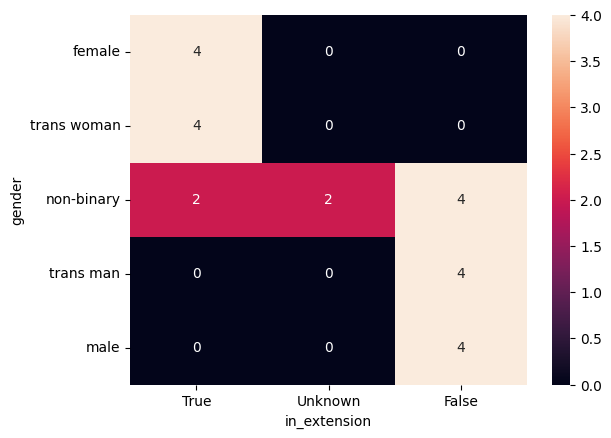

In [18]:
sn.heatmap(confusion_matrix(oed_results), annot=True)

<Axes: xlabel='in_extension', ylabel='woman'>

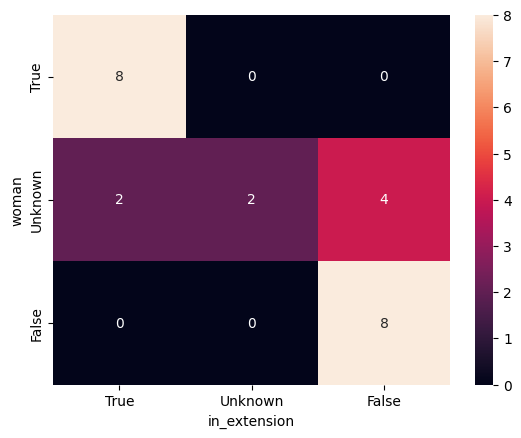

In [19]:
sn.heatmap(confusion_matrix_2(oed_results), annot=True)

In [37]:
oed_cm = pycm.ConfusionMatrix(oed_results["woman"].tolist(), oed_results["in_extension"].tolist(), digit=2, classes=['True', 'Unknown', 'False'])
print(f'Accuracy: {oed_cm.overall_stat["Overall ACC"]:.2f}')
print(f'Scott\'s Pi: {oed_cm.PI:.2f}')

Accuracy: 0.75
Scott's Pi: 0.61


<Axes: xlabel='in_extension', ylabel='gender'>

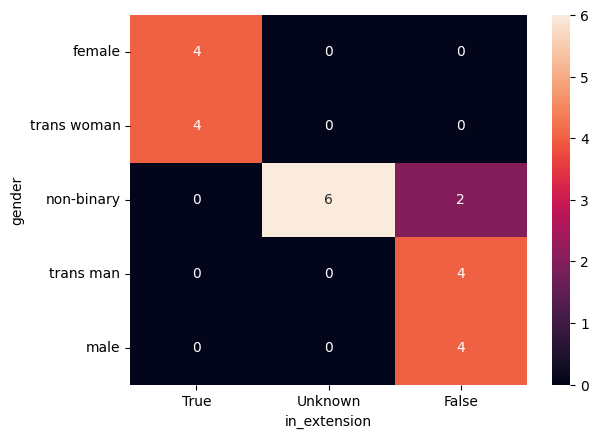

In [21]:
sn.heatmap(confusion_matrix(haslanger_results), annot=True)

<Axes: xlabel='in_extension', ylabel='woman'>

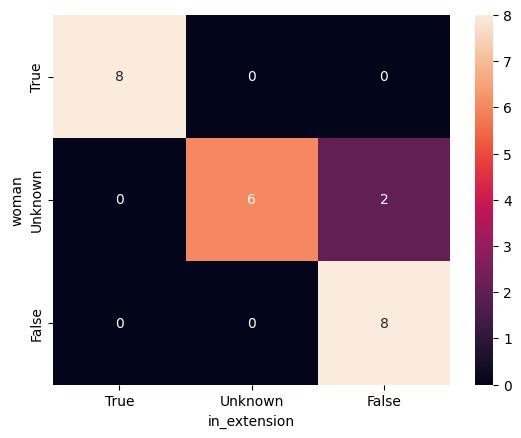

In [22]:
sn.heatmap(confusion_matrix_2(haslanger_results), annot=True)

In [39]:
haslanger_cm = pycm.ConfusionMatrix(haslanger_results["woman"].tolist(), haslanger_results["in_extension"].tolist(), digit=2, classes=['True', 'Unknown', 'False'])
print(f'Accuracy: {haslanger_cm.overall_stat["Overall ACC"]:.2f}')
print(f'Scott\'s Pi: {haslanger_cm.PI:.2f}')

Accuracy: 0.92
Scott's Pi: 0.87


<Axes: xlabel='in_extension', ylabel='gender'>

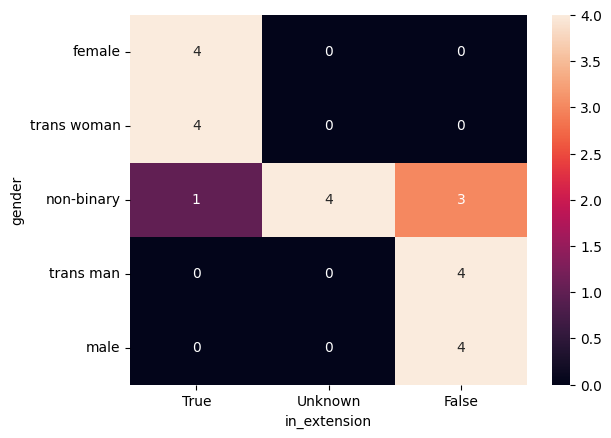

In [24]:
sn.heatmap(confusion_matrix(homosaurus_results), annot=True)

<Axes: xlabel='in_extension', ylabel='woman'>

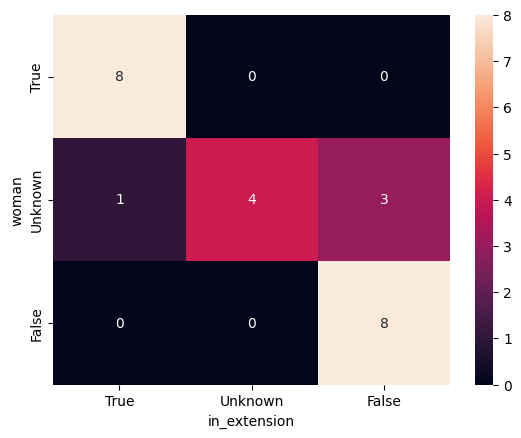

In [25]:
sn.heatmap(confusion_matrix_2(homosaurus_results), annot=True)

In [40]:
homosaurus_cm = pycm.ConfusionMatrix(homosaurus_results["woman"].tolist(), homosaurus_results["in_extension"].tolist(), digit=2, classes=['True', 'Unknown', 'False'])
print(f'Accuracy: {homosaurus_cm.overall_stat["Overall ACC"]:.2f}')
print(f'Scott\'s Pi: {homosaurus_cm.PI:.2f}')

Accuracy: 0.83
Scott's Pi: 0.75


In [27]:
def evaluation_record(model, concept, data):
    return {
        "created": datetime.now().isoformat(),
        "model": {
            "name": cea.model_name,
            "temperature": cea.temperature,
        },
        "concept": {
            "id": concept.id,
            "term": concept.term,
            "definition": concept.definition,
        },
        "data": data.to_dict('records'),
    }

In [28]:
oed_evaluation_record = evaluation_record(cea, oed_woman, pd.concat([entities, oed_classifications], axis=1))
haslanger_evaluation_record = evaluation_record(cea, haslanger_woman, pd.concat([entities, haslanger_classifications], axis=1))
homosaurus_evaluation_record = evaluation_record(cea, homosaurus_woman, pd.concat([entities, homosaurus_classifications], axis=1))
json.dump(
    oed_evaluation_record, 
    open(f'data/{oed_evaluation_record["model"]["name"]}_{oed_evaluation_record["concept"]["id"]}_{oed_evaluation_record["created"]}.json', 'w')
)
json.dump(
    haslanger_evaluation_record, 
    open(f'data/{haslanger_evaluation_record["model"]["name"]}_{haslanger_evaluation_record["concept"]["id"]}_{haslanger_evaluation_record["created"]}.json', 'w')
)
json.dump(
    homosaurus_evaluation_record, 
    open(f'data/{homosaurus_evaluation_record["model"]["name"]}_{homosaurus_evaluation_record["concept"]["id"]}_{homosaurus_evaluation_record["created"]}.json', 'w')
)